# Week X - Decision Trees

<hr style="border:2px solid gray">

# Index: <a id='index'></a>
1. [Classification](#classification)
1. [Overfitting](#overfitting)
1. [Regression](#regression)
1. [Poor Predictors](#poor)
1. [Introduction to Ensemble Learning](#ensemble)
1. [Random Forests](#rf)
1. [Feature Importance](#feature)
1. [Boosting](#boosting)
1. [Appendix](#appendix)
    1. [Regression DT Code Example](#regression_app)
    1. [Adaboost: Mathematics and Code](#adaboost_app)
    1. [Gradient Boosting: Regression Code Example](#gb_app)

**Keywords:** CART Algorithm, overfitting, ensembles, OOB score, bagging, pasting, random forests, 

<hr style="border:2px solid gray">

## Classification [^](#index) <a id='classification'></a>


Like SVMs, decision trees (DTs) are a very popular form of ML, and can be used as a constituent of even more powerful ML models. They can be used for both classification and regression (although they are most commonly used for classification). 

DTs work by dividing the data along different "hard lines" or "cuts" that best separate the data. They continue to make decisions this until no more improvement can be made, or until the (user defined) maximum number of cuts has been reached. 

Decision trees are easiest to explain via an example, so let's write a decision tree and have a look. We will look at the iris data again:

In [1]:
import numpy as np
import pylab as pl 
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
pl.rcParams['figure.figsize'] = [10, 5] # setting a nice big figure size
iris=load_iris()
display(iris.feature_names)

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [2]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(iris['data'],iris['target'], test_size=0.2,random_state=20) 

In [3]:
from sklearn import tree
clf = tree.DecisionTreeClassifier(max_depth=2, random_state =50) 
# max_depth is important is it the maximum number of divisions. 
# Random_stae just means that you will get the same numbers as I do.
clf.fit(X_train,y_train)


DecisionTreeClassifier(max_depth=2, random_state=50)

In [4]:
pred=clf.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))


0.9


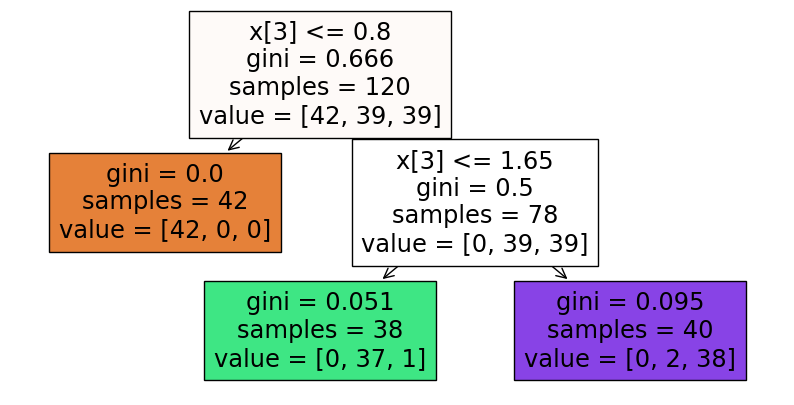

Index:  3 . Threshold:  0.800000011920929
Index:  -2 . Threshold:  -2.0
Index:  3 . Threshold:  1.6500000357627869
Index:  -2 . Threshold:  -2.0
Index:  -2 . Threshold:  -2.0


In [5]:
tree.plot_tree(clf,filled=True)
pl.show()

feature = clf.tree_.feature 
# an array of the indices of each feature being used to split a node
# will be -2 if node is a leaf

threshold = clf.tree_.threshold 
# an array of the threshold value. This will be '-2' if a node is a leaf

for i, j in zip(feature, threshold):
    print ("Index: ", i,". Threshold: ", j)


The **root node**  is the first node of the decision tree. In this case, it looks at feature X[3] (the petal width) and makes a decision based on whether it is greater than or less than 0.8. 

**Internal nodes** (or sometimes just nodes) are nodes with arrows going away from them.

A **leaf** is a node with only arrows going to it.

The decision tree algorithm continues dividing the data until it either sees that there is no point, or it has got the maximum depth that you have allowed it. With the leaf on the left, there is no point going any further as it is already only of one sort of iris. In contrast, the right hand side continues to divide until it has reached the maximum depth of two.

### Choosing the Cut Positions
The location of the cut is chosen to maximising the reduction in impurity using the *Classification and Regression Tree*, CART, algorithm. By default this uses the Gini impurity defined as:

$G=1-\Sigma_i p_i^2$

where $p_i$ is the probability of getting a given outcome -- the lower the gini impurity the purer the sample.

So you can see that the leaf on the left has a Gini impurity of 0 as it is already pure, whereas the leaf in the middle has an impurity of

$ G= 1- \left(\left(\dfrac{37}{38}\right)^2 +\left(\dfrac{1}{38}\right)^2\right) = 0.051$

Gini impurity is the default, but you can also use entropy, defined as:

$H=\Sigma_i p_i\log_2 (p_i) $

It is said that Gini tends to produce branches that are pure in one classification, whereas entropy tends to produce a more balanced tree, however I have never made any systematic studies myself. 


<div style="background-color:#FFCCCB">

### CART algorithm ###

The Cart algorithm uses three steps to create a decision tree
1. _Greedy Algorithm_: Before each branch divison, the algorithm will split the training data into two subsets using a particular feature k (e.g. petal width), and a particular threshold $t_{k}$ (e.g. 0.8 cm). k and $t_{k}$ are found by minimising the following cost function:
    
    $J(k,t_{k})= \frac{m_{left}}{m}G_{left} + \frac{m_{right}}{m}G_{right}$
    
    where G is the Gini (or entropy) impurity of the left/right branch, and $m_{left/right}$ is the number of instances in each of the respective branches.
    This process continues recursively, and is called the _greedy_ method beacsue the best split points are chosen each time.
    
    
2. _Stopping Criteria_: The Greedy algorithm needs to know when to stop splitting. This can be achieved in a number of ways, including max_depth and min_samples_leaf (discussed further on)
3. _Tree Pruning_: The **complexity** of a decision tree is defined as the number of splits in the tree. Ideally we would like to minimise complexity (simpler trees are less likely to copy data). The simplest approach to 'prune' the tree is for the algorithm to evaluate the effect of deleting each leaf node.
    
See [Machine Learning Mastery](https://machinelearningmastery.com/classification-and-regression-trees-for-machine-learning/) for a more in-depth look, and the comparisson of the maths behind using a DT for regression vs classification.
    
    
_References_: [Geeks for Geeks](https://www.geeksforgeeks.org/cart-classification-and-regression-tree-in-machine-learning/), [Machine Learning Mastery](https://machinelearningmastery.com/classification-and-regression-trees-for-machine-learning/), {HoML}

<div style="background-color: #FFF8C6">

### Additional DT Example

Below is just some code that I found (I think on the sklearn site) that will plot the results for the iris -- it is only included in case you wanted to see how the process works for a (different) tree with multiple dimensions. Most examples we consider will be in two dimensions just as it is easier to visualise

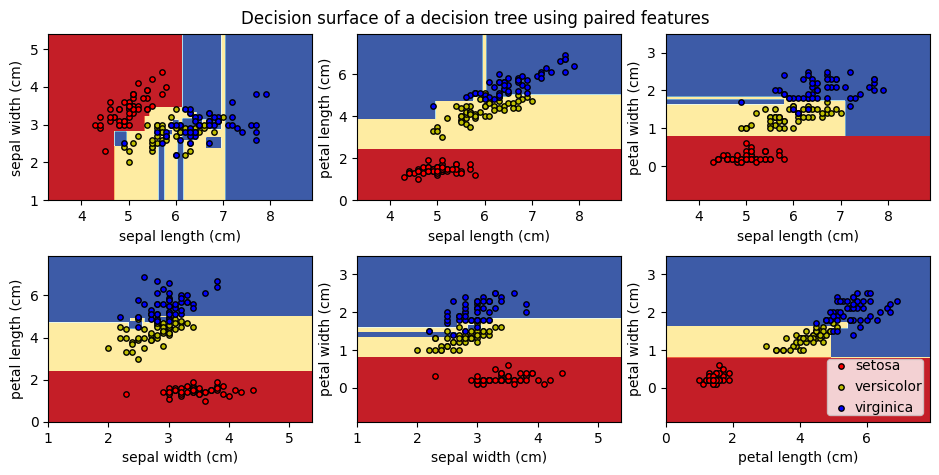

<Figure size 1000x500 with 0 Axes>

In [6]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

# Parameters
n_classes = 3
plot_colors = "ryb"
plot_step = 0.02

# Load data
iris = load_iris()

for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3], [1, 2], [1, 3], [2, 3]]):
    # We only take the two corresponding features
    X = iris.data[:, pair]
    y = iris.target

    # Train
    clf = DecisionTreeClassifier().fit(X, y)

    # Plot the decision boundary
    plt.subplot(2, 3, pairidx + 1)

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(
        np.arange(x_min, x_max, plot_step), np.arange(y_min, y_max, plot_step)
    )
    plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

    plt.xlabel(iris.feature_names[pair[0]])
    plt.ylabel(iris.feature_names[pair[1]])

    # Plot the training points
    for i, color in zip(range(n_classes), plot_colors):
        idx = np.where(y == i)
        plt.scatter(
            X[idx, 0],
            X[idx, 1],
            c=color,
            label=iris.target_names[i],
            cmap=plt.cm.RdYlBu,
            edgecolor="black",
            s=15,
        )

plt.suptitle("Decision surface of a decision tree using paired features")
plt.legend(loc="lower right", borderpad=0, handletextpad=0)
plt.axis("tight")

plt.figure()
clf = DecisionTreeClassifier().fit(iris.data, iris.target)
#plot_tree(clf, filled=True)
plt.show()

<hr style="border:2px solid gray">

## Overfitting [^](#index) <a id='overfitting'></a>

We will use a more complex example to demonstrate the dangers of overfitting with DTs. Here we use the sklearn moons dataset:

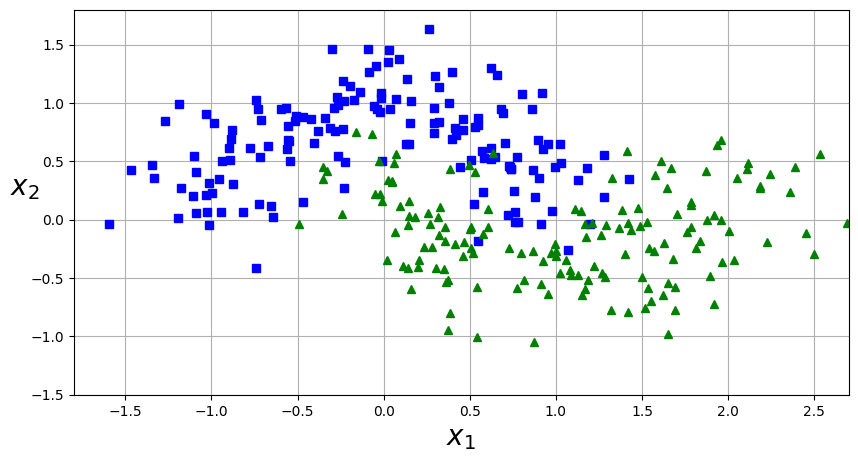

In [7]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=300, noise=0.25, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.8, 2.7, -1.5, 1.8])
plt.show()

240


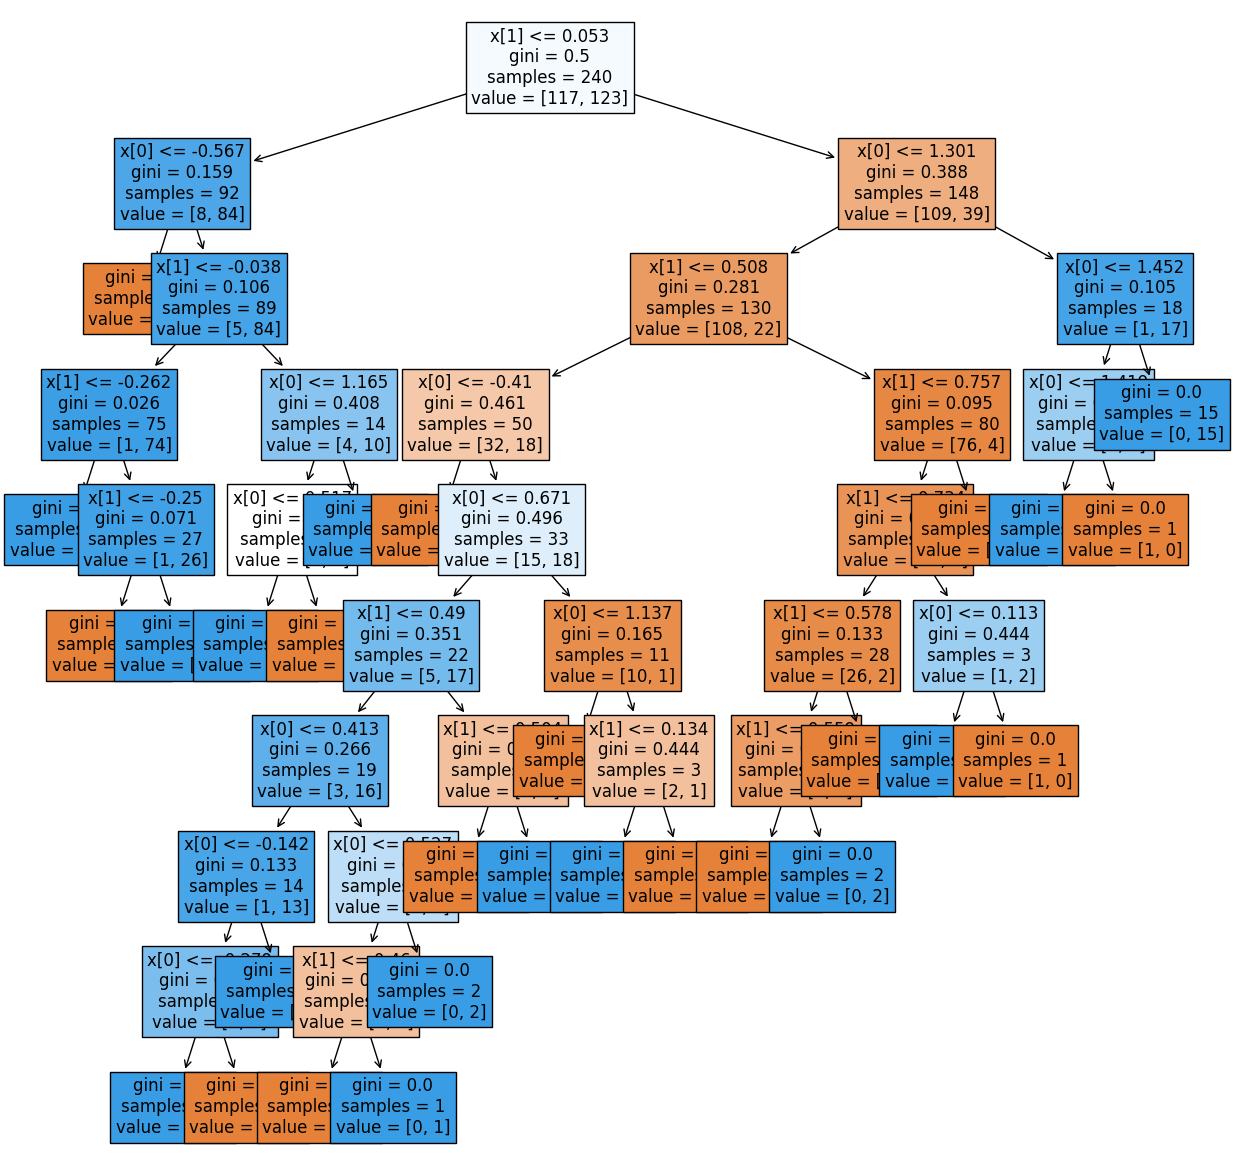

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=20) 
print(len(y_train))
clf = tree.DecisionTreeClassifier(max_depth=200)
pl.rcParams['figure.figsize'] = [15, 15] #nice big plots
clf.fit(X_train,y_train)
tree.plot_tree(clf,filled=True,fontsize=12)
pl.savefig('tree.png')
pl.show()


In [9]:
pred=clf.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))


0.9333333333333333


In [10]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap)
    
    custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
    pl.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        pl.plot(X[:, 0][y==0], X[:, 1][y==0], "yo")
        pl.plot(X[:, 0][y==1], X[:, 1][y==1], "bs")
        pl.plot(X[:, 0][y==2], X[:, 1][y==2], "g^")
        pl.axis(axes)
    pl.xlabel(r"$x_1$", fontsize=18)
    pl.ylabel(r"$x_2$", fontsize=18, rotation=0)


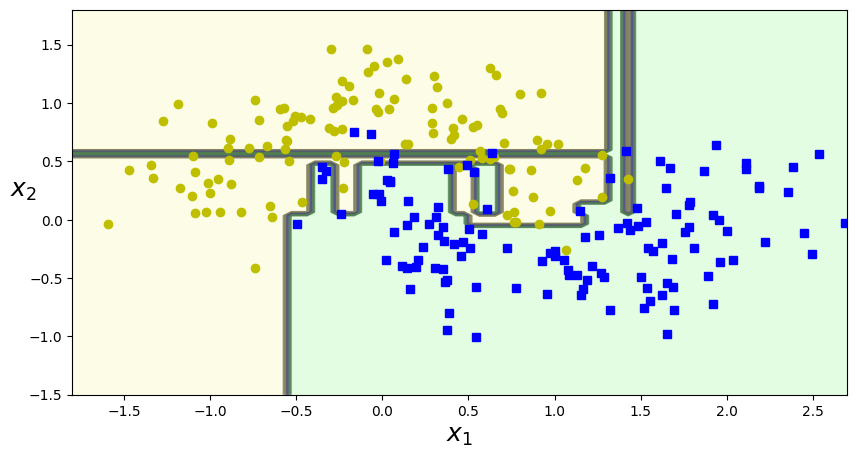

In [11]:
pl.rcParams['figure.figsize'] = [10, 5] #more reasonable plots
plot_decision_boundary(clf,X_train,y_train, axes=[-1.8, 2.7, -1.5, 1.8])

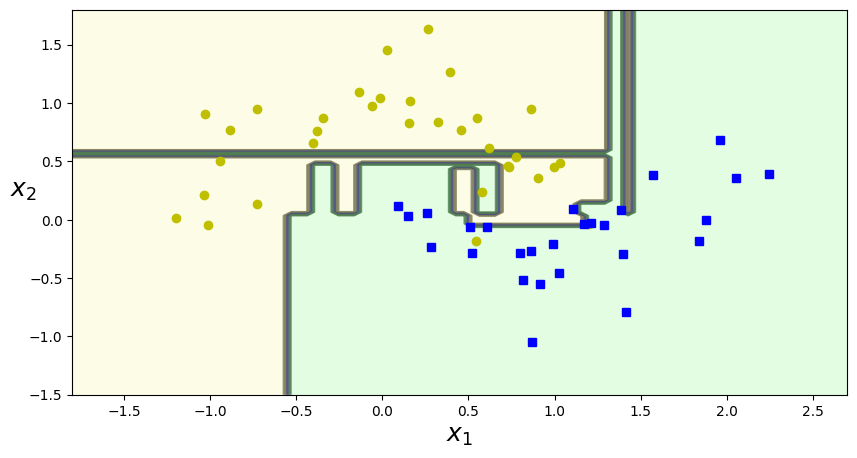

In [12]:
# now look at the testing data
plot_decision_boundary(clf,X_test,y_test, axes=[-1.8, 2.7, -1.5, 1.8])

Overfitting (as shown clearly here) is a common drawback of decision trees, however there are number of things that you can do to regularise this. You have aleardy seen the max_depth parameter, but you could also use min_samples_leaf (the minimum number of samples a leaf must have), and the min_samples_split (the minimum number of sample a node must have before it can split). 

<div style="background-color:#C2F5DD">

### Exercise

Investigate all three different ways of regularising this data, and try to understand how well the methods generalise. 
</div> 


<hr style="border:2px solid gray">

## Regression [^](#index) <a id='regression'></a>

DTs can also be used for regression, in which case the resulting tree is called a **regression tree**. In this tree, each leaf represents a single numerical value. We can consider a simple, polynomial 2-D case:

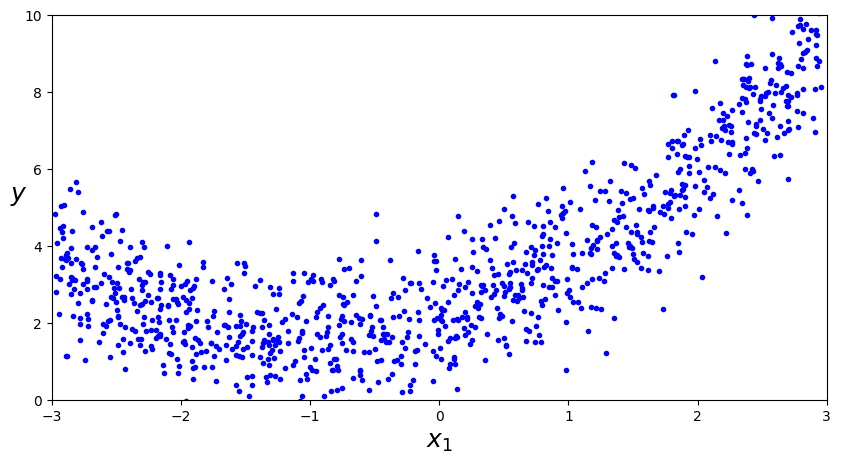

In [13]:
#generate some data
import numpy as np
import numpy.random as rnd
import matplotlib.pyplot as plt

np.random.seed(42)

m = 1000
X = 6 * np.random.rand(m, 1) - 3


y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])

plt.show()

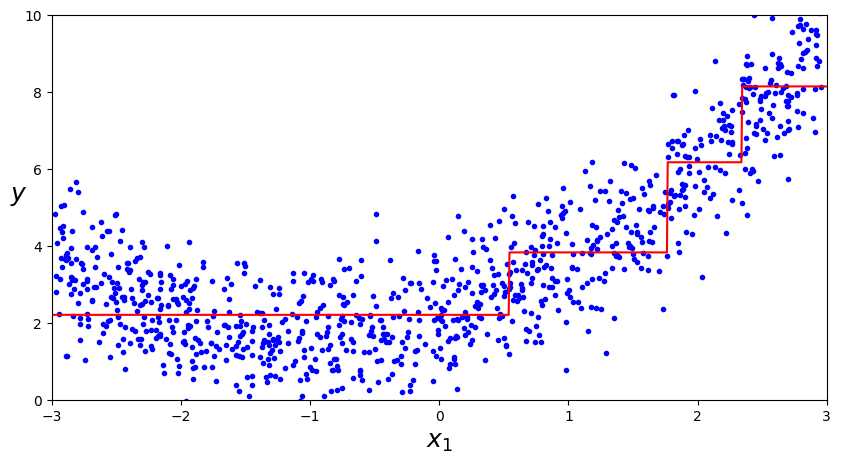

In [14]:
#Performing our regression fit
reg=tree.DecisionTreeRegressor(max_depth=2)
reg.fit(X,y)

#now draw the results on top of the original
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
xd=np.linspace(-3,3,1000)
yd=reg.predict(xd.reshape(-1,1))
pl.plot(xd,yd,'r-')
pl.show()


[Text(0.5, 0.8333333333333334, 'x[0] <= 1.767\nsquared_error = 5.463\nsamples = 1000\nvalue = 3.577'),
 Text(0.25, 0.5, 'x[0] <= 0.542\nsquared_error = 1.729\nsamples = 791\nvalue = 2.598'),
 Text(0.125, 0.16666666666666666, 'squared_error = 1.257\nsamples = 599\nvalue = 2.205'),
 Text(0.375, 0.16666666666666666, 'squared_error = 1.207\nsamples = 192\nvalue = 3.827'),
 Text(0.75, 0.5, 'x[0] <= 2.345\nsquared_error = 2.257\nsamples = 209\nvalue = 7.28'),
 Text(0.625, 0.16666666666666666, 'squared_error = 1.149\nsamples = 91\nvalue = 6.168'),
 Text(0.875, 0.16666666666666666, 'squared_error = 1.421\nsamples = 118\nvalue = 8.138')]

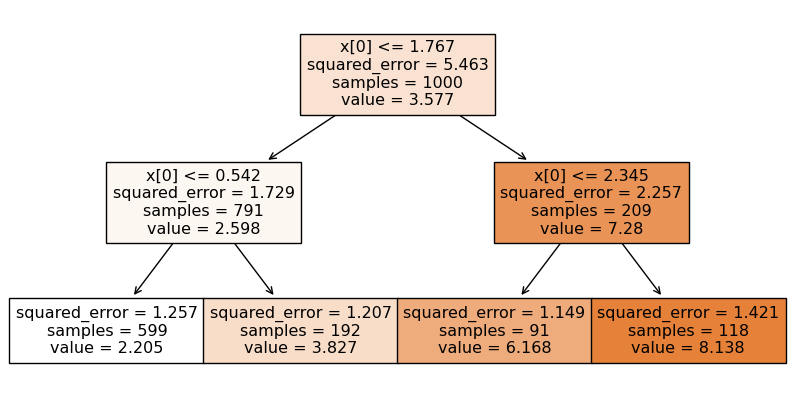

In [15]:
# and the tree itself
tree.plot_tree(reg,filled=True)

<div style="background-color:#C2F5DD">

### Exercise
    
Now try changing max_depth, letting the values fall between 1 and 300. Start off going up in in single units, and then make bigger jumps as the depth increases.
    
</div>
    
We can see that a fairly deep DT is required to approximate the fit, and even then the fit is not continuous. This is a major reason why other regression models are used over regression trees for such continuous data, and DTs are chosen instead for classification.

<div style="background-color:#FFCCCB">

### Mathematics of Regression <a id='regression_main'></a>
    
It is simpler conceptionally to understand how DT work for classification rather than for regression. Essentially, at each node the DT will split a feature at a specific value - the feature and value are chosen to minimise the **sum of the squared residuals** (this sum is effectively the **loss function** for a regression tree). The leaves to the left and right have the numerical value of the **average** of the input data that falls in each specific section.
    
If we were using multiple features, we would split the data along the feature where the loss was minimised.
    
The tree will then continue in the same way as for classification trees.
    
A worked example to make the process clearer is found [here](#regression_app)

<hr style="border:2px solid gray">

## Poor Predictors [^](#index) <a id='poor'></a>


The problem with decision trees is that they are not very good at making predictions (otherwise they would be used everywhere). We can see an example of this by looking at the MNIST digit data again. 

In [16]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1, as_frame=False)
print(mnist.keys())
#Ignore any future warnings, they will not affect the outcome of the code

/Users/frejaschaap/opt/anaconda3/envs/ML_env/lib/python3.9/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])


In [17]:
X, y = mnist["data"], mnist["target"]

In [18]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
print(X_train.shape,X_test.shape)

(60000, 784) (10000, 784)


In [19]:
clf = tree.DecisionTreeClassifier(max_depth=20)
clf.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=20)

In [20]:
#print(X_test.shape)
pred=clf.predict(X_test)
#print(pred.shape)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))


0.8816


['7', '2', '1', '0', '4', '1', '4', '0', '8', '9']


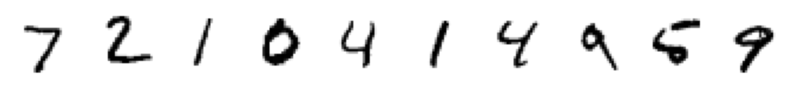

In [21]:
# compare the first 10
predictions=[]
import matplotlib as mpl
for i in range(10):
    pl.subplot(1,10,i+1)
    some_digit = X_test[i] # just to pick an arbitrary figure. Try a different one
    predictions.append(pred[i])
    some_digit_image = some_digit.reshape(28, 28)
    plt.imshow(some_digit_image, cmap=mpl.cm.binary)
    plt.axis("off")
print (predictions)   

<div style="background-color:#C2F5DD">

### Exercise

Use GridSearchCV to try to find the hyperparameters that best predict the MNIST data. Carry out the same validation as you did for the kNN algorithm. i.e. best_params_, best_score and test against the testing set. FInally print out the predicitions for the first 20 numbers and compare with the actual images (the code below preints the images)
    
[This section below could perhaps be moved to ML1:
    https://www.mygreatlearning.com/blog/gridsearchcv/ is a good option, since SKLearn's documentation is quite opaque
    GridSearchCV finds optimal value for hyperparamers of a model. Commonly, the following It takes the following parameters: 
    - estimator (the ML model being used)
    - params_grid (the dictionary object that holds the paramters you want to try)
    - cv (number of cross-validations you have to try for each selected set of hyperparameters)
    - I don't understand verbose????]]
    
    


<hr style="border:2px solid gray">

## Introduction to Ensemble Learning [^](#index) <a id='ensemble'></a>

Ensemble learning refers to when many models are used to make a prediction, which is often better than just using one. You can have different types of models all returning an an answer and have a voting scheme between them - sklearn has VotingClassifier for this. If a straight vote is taken then voting is said to be **hard** (voting='hard'). However, if the classifiers being called all have a predict_prob() method then **soft** voting can be used, where the probablility is taken into account. 

The area where ensemble learning is used most is with DT.

<div style="background-color: #FFF8C6">

### Ensemble Learning Example

Here we will train the model on the moon dataset, using SVC, Logistic Regression and SGD. Try experimenting with soft voting if you have time, or other training models


In [22]:
from sklearn.ensemble import VotingClassifier
from sklearn.svm import SVC
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier


X, y = mnist["data"], mnist["target"]
X_train, X_test, y_train, y_test = X[:20000], X[20000:], y[:20000], y[20000:]

svc_clf=SVC(max_iter=20)
tree_clf = tree.DecisionTreeClassifier(max_depth=20) 
sgd_clf = SGDClassifier(max_iter=30)

voting_clf = VotingClassifier(
    estimators=[('svc', svc_clf), ('dt', tree_clf), ('sgd', sgd_clf)],
    voting='hard')


In [23]:
from sklearn.metrics import accuracy_score
for clf in (svc_clf, tree_clf, sgd_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

/Users/frejaschaap/opt/anaconda3/envs/ML_env/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVC 0.83374
DecisionTreeClassifier 0.83728


/Users/frejaschaap/opt/anaconda3/envs/ML_env/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier 0.86108


/Users/frejaschaap/opt/anaconda3/envs/ML_env/lib/python3.9/site-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=20).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
/Users/frejaschaap/opt/anaconda3/envs/ML_env/lib/python3.9/site-packages/sklearn/linear_model/_stochastic_gradient.py:713: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


VotingClassifier 0.90124


### Bagging and pasting

Another way of generating lots of estimatimators is to use the same classifier many times, each time training on a randomly chosen sample from the training set. This is commonly used with decison trees to create a **Random Forest** (discussed in more detail further below).

If these samples are taken with replacement, this is called **bagging** (apparently short for *bootstrap aggregation*). **With replacement** means that when a sample is taken, its features recorded and then it is "thrown back into the bag" - i.e. it can be selected again.

If the samples are taken **without replacement** (i.e. not thrown back), this is called **pasting**. 


<div style="background-color: #FFF8C6">

#### Validation vs Out of Bag (OOB) Score
    
Consider a single classifier in the ensemble:
- It is trained on a small sample of the training data
- The unused training data (specific to each classifier) is called the **Out of Bag** sample. 
- After training, the OOB data is then given as unseen data to the classifier. 
    
The OOB score is the the fraction of correctly classified data from the OOB samples over all classifiers.
    
In contrast, the validation score is calculated from from the test data, which was separated from the training data. All the classifiers in the ensemble will receive the sama data to evaluate.

_References_: [Towards Data Science](https://towardsdatascience.com/what-is-out-of-bag-oob-score-in-random-forest-a7fa23d710)
    
</div>

Let's look again at our moon distributions.

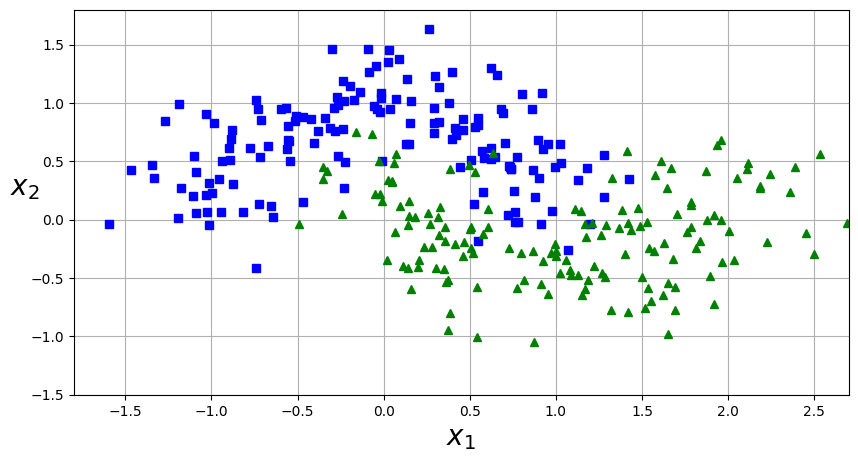

In [24]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=300, noise=0.25, random_state=42)

def plot_dataset(X, y, axes):
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "bs")
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "g^")
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_dataset(X, y, [-1.8, 2.7, -1.5, 1.8])
plt.show()

If we use a DT without any max_depth set we get:

240


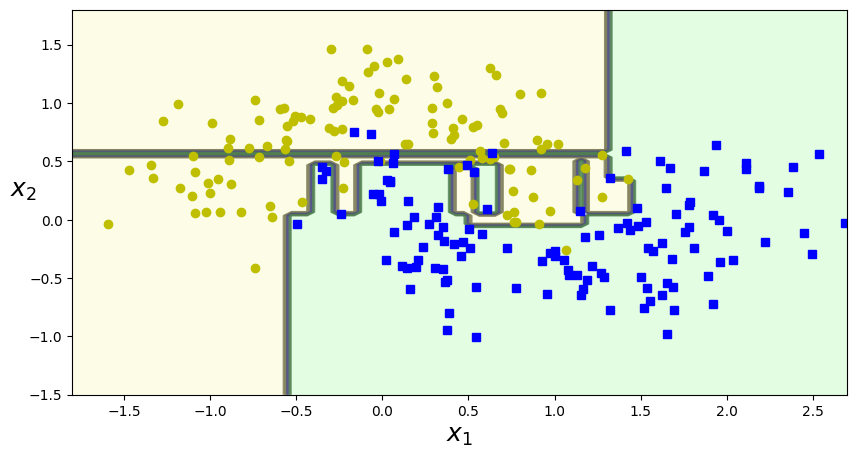

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2,random_state=20) 
print(len(y_train))
clf = tree.DecisionTreeClassifier()
clf.fit(X_train,y_train)
pl.rcParams['figure.figsize'] = [10, 5] #more reasonable plots
plot_decision_boundary(clf,X_train,y_train, axes=[-1.8, 2.7, -1.5, 1.8])

Whereas if we use a bagging algorithm we get:

OOB score:  0.8875
Validation score:  0.9333333333333333


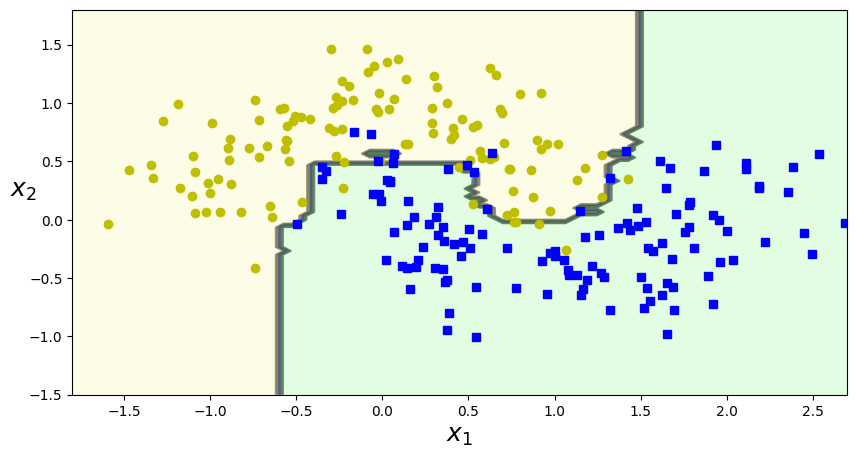

In [26]:
# now if we try bagging 
from sklearn.ensemble import BaggingClassifier

bclf=BaggingClassifier(
    tree.DecisionTreeClassifier(),n_estimators=500,max_samples=100, bootstrap=True,n_jobs=4,oob_score=True)
#n_jobs is the number of CPU cores it will use both in training and predicting.
#n_estimators is how many classifiers it will run
#max_samples is number of samples to draw from the training X
#bootstrap means bagging
#oob = "out of the bag"
bclf.fit(X_train,y_train)
plot_decision_boundary(bclf,X_train,y_train, axes=[-1.8, 2.7, -1.5, 1.8])

pred=bclf.predict(X_test)
print('OOB score: ',bclf.oob_score_)
from sklearn.metrics import accuracy_score
print('Validation score: ',accuracy_score(y_test, pred))

<div style="background-color:#C2F5DD">

### Exercise

Try experimenting with the max depth to see what difference it makes. Also try different numbers estimators and samples. The documentation can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html).


<div style="background-color:#C2F5DD">

### Exercise

Bagging can also be used for regression. Try this on the data set that we looked at earlier for regression.

<hr style="border:2px solid gray">

## Random Forests [^](#index) <a id='rf'></a>

Random forests are ensembles of DTs, usually with bagging (possible with pasting) and where the max_sample is around the size of the training sample. Clearly you can build these using the BaggingClassifier, however sklearn has them built in. See the code below

0.9
0.95


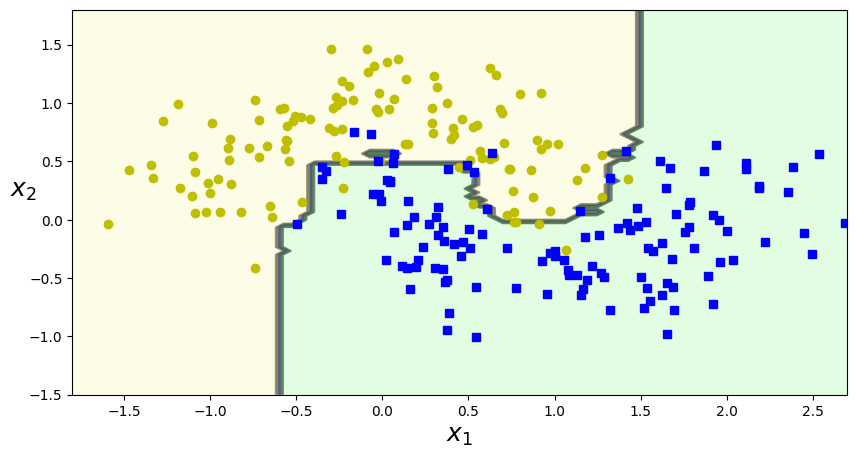

In [27]:
from sklearn.ensemble import RandomForestClassifier

rfclf=RandomForestClassifier(n_estimators=500,max_leaf_nodes=20,n_jobs=4,oob_score=True)

rfclf.fit(X_train,y_train)
plot_decision_boundary(bclf,X_train,y_train, axes=[-1.8, 2.7, -1.5, 1.8])

pred=rfclf.predict(X_test)
print(rfclf.oob_score_)
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))

<hr style="border:2px solid gray">

## Feature Importance [^](#index) <a id='feature'></a>

It is often useful to look at the importance of different features in your data. For example, look at the example below for the training MNIST data set.

In [28]:
X_m, y_m = mnist["data"], mnist["target"]
X_train_m, X_test_m, y_train_m, y_test_m = X_m[:60000], X_m[60000:], y_m[:60000], y_m[60000:]

rfclf=RandomForestClassifier(n_estimators=500,max_leaf_nodes=20,n_jobs=4,oob_score=True)
rfclf.fit(X_train_m,y_train_m)



RandomForestClassifier(max_leaf_nodes=20, n_estimators=500, n_jobs=4,
                       oob_score=True)

In [29]:
pred=rfclf.predict(X_test_m)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test_m, pred))


0.8517


Below we will plot a heat map showing the importance of each pixel

In [30]:
import matplotlib as mpl
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = mpl.cm.hot,
               interpolation="nearest")
    plt.axis("off")

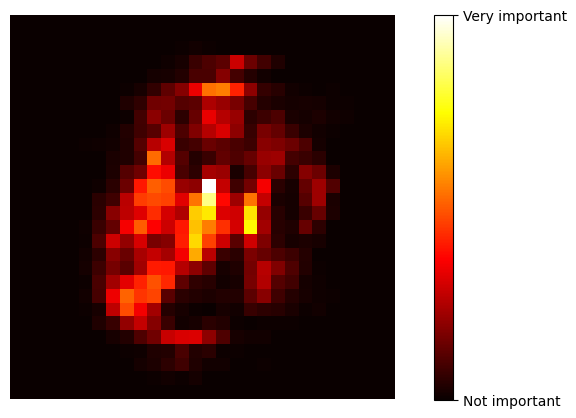

In [31]:
plot_digit(rfclf.feature_importances_)

cbar = plt.colorbar(ticks=[rfclf.feature_importances_.min(), rfclf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])

plt.show()

The numerical values can be important too (although they do not mean much for the MNIST data). Let us consider our iris dataset again:

array([0.11837492, 0.02189731, 0.37985617, 0.4798716 ])

<AxesSubplot:>

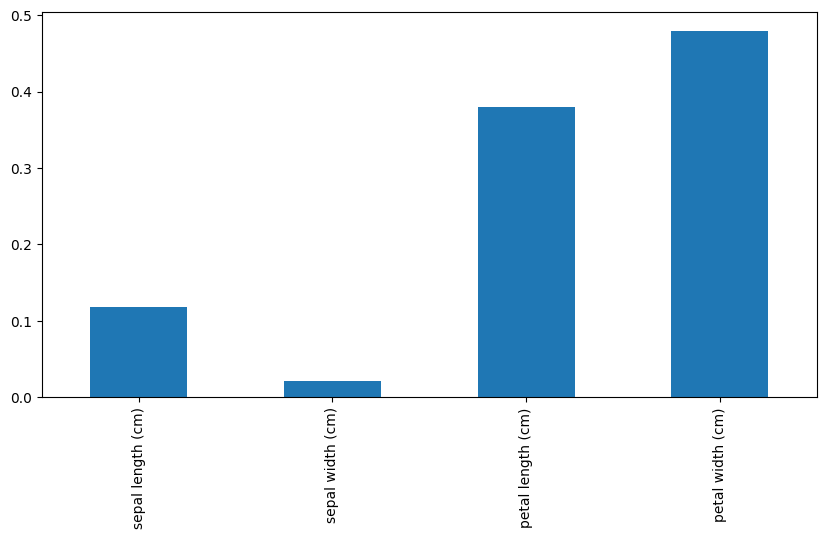

In [32]:
X_train_i, X_test_i, y_train_i, y_test_i = train_test_split(iris['data'],iris['target'], 
                                                            test_size=0.2,random_state=20) 
rfclf=RandomForestClassifier(n_estimators=500,n_jobs=4)
rfclf.fit(X_train_i,y_train_i)
display(rfclf.feature_importances_)

# which you can then plot 
import pandas as pd
imps=pd.Series(rfclf.feature_importances_, index=iris.feature_names)
imps.plot.bar()

# There are a number of different ways to plot these and this is just one example.


<hr style="border:2px solid gray">

# Boosting [^](#index) <a id='boosting'></a>

Another way of combining DTs is through boosting, which is often more powerful than Random Forests. Here you choose your ensembles in non-random ways, generally combining **weak learners** (typically short DTs, defined as classifiers that produce a prediction slightly better than a random guess) to produce strong learners. 

There are lots of different boosting algorithms, however two common algorithms are **Adaptive Boosting (AdaBoost)** and **Gradient Boosting (GB)**. 

<div style="background-color: #FFF8C6">
    
### AdaBoost Algorithm Overview <a id='adaboost'></a>
    
AdaBoost is similar in structure to the Random Forest model but with three key differences: 
- In Adaboost, the constituent 'trees' must be **decision stumps** - DTs with depth 1 and just two leaves. In a RF, the depth is not specified.
- In Adaboost, each constituent stump is weighted based on their classification accuracy. In a RF, each tree gets an equal weight.
- In Adaboost, unlike in RF, the order that stumps are created is important

The basic process goes as follows:
    
- Initially, all samples are given equal weight (where the weights indicate how important it is for a given sample to be classified correctly), however this will be updated throughout the AdaBoost process
    
- We then find the decision stump that best classifies the sample data.
    
- More weight is assigned to the incorrectly classified samples, so that their is a greater priority to classify them correctly in future decision stumps. The classifier is also given a weight based upon its accuracy.
    
- The process than repeats until all the sample data has been correctly classified, or until the maximm number of repetions have been met.
    
For a worked code example with the detailed mathematics, please read the Appendix section [Adaboost: Mathematics and Code](#adaboost_app)


<div style="background-color: #FFF8C6">
    
### Gradient Boosting Algorithm Overview <a id='gb'></a>
    
_In this cell, we focus on Gradient Boosting for regression. The same model structure applies for classification problems, however it uses many features from **logistic regression**, which is beyond the scope of the course_
    
In Gradient Boosting (GB), we consider two types of model:
    
- A "weak" model (_f_), typically a DT
- A "strong" model (_F_), made of multiple weak models

Initially, the strong model is set as a constant (the average of all the outputs). We can consider this as being a single 'leaf' of a DT. The algorithm then improves the model in stages:
    
1. The weak model is trained to predict the _gradient_ of the strong model's loss function - this is called the **pseudo response**. 
    
The most popular loss function for Gradient boost regression is: 
\begin{equation}    
\frac{1}{2}(observed-predicted)^2
\end{equation}     
The derivative of this loss function wrt the predicted values is simply $-(observed-predicted)$. This is the 'error'
    
2. The weak model is then added to the strong model with a negative sign to reduce the error of the strong model.
    
3. The process repeats until stopping criterion met
    
We can represent this iteration more mathematically as: 
\begin{equation}    
    F_{i+1} = F_{i} - f_{i}
\end{equation}    
Much like in previously seen ML models, we are in danger of overfitting our model. To fix this we can use **learning rate** or **shrinkage** ($v$), a small value (~0.1) - this is similar to what we saw with an SGD model. Taking many small steps in the 'correct direction' should result in better predictions with a lower variance.
    
\begin{equation}    
    F_{i+1} = F_{i} - vf_{i}
\end{equation}

For a worked code example, please read the Appendix section [Gradient Boosting: Regression Code Example](#gb_app)

_For a more in depth explanation, watch [StatQuest](https://www.youtube.com/watch?v=2xudPOBz-vs) (27 mins)_
    
_References_: [Google ML course](https://developers.google.com/machine-learning/decision-forests/intro-to-gbdt)
</div>


<div style="background-color: #FFF8C6">
    
### Comparing Adaboost and Gradient Boost (GB)
    
- Adaboost initially creates stumps whereas GB starts with a single leaf. 
- Like Adaboost, GB than builds a size-limited DT based on the errors of the previous trees. However in Adaboost these trees are decision stumps, whereas typically GB has more layers.
- In Adaboost, the decision stumps have different weightings in the overall model; in GB all trees are scaled the same amount by $v$

### XGBoost

Although sklearn can perform gradient boosting classification and regression, the best tool available is the very powerful and very fast [XGBoost](https://xgboost.readthedocs.io/en/latest/index.html). XGBoost (e**X**treme **G**radient **B**oost) is a complex algorithm with many constituent parts, and as such we will not include a detailed explanation here (see [StatQuest](https://www.youtube.com/watch?v=OtD8wVaFm6E) if you want this information). A major takeaway is that XGBoost and Gradient Boost both make decision trees to predict the gradient of the loss function (i.e. the error), however XGBoost uses a unique type of DT that aims to divide there errors based on their 'similarity' to one another. 

Below is a very simple example (using the moons dataset) just to show that the syntax for the xgboost module is the same as with sklearn. XGBoost has many different parameters to tune, but for brevity we will only consider a simple use case here.

/Users/frejaschaap/opt/anaconda3/envs/ML_env/lib/python3.9/site-packages/xgboost/sklearn.py:1395: UserWarning: `use_label_encoder` is deprecated in 1.7.0.
  warnings.warn("`use_label_encoder` is deprecated in 1.7.0.")


0.9666666666666667


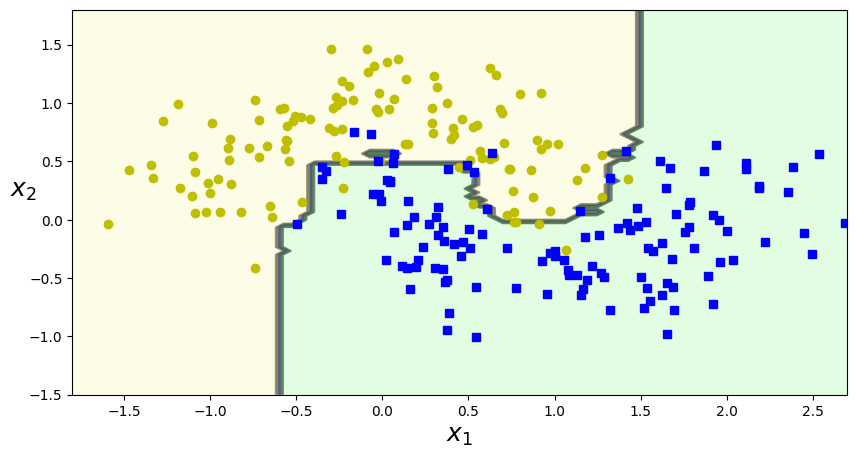

In [33]:
from xgboost import XGBClassifier
xgbclf=XGBClassifier(use_label_encoder=False,eval_metric='error') # this is a stop warning that doesn't apply to us anyway - try removing
xgbclf.fit(X_train,y_train)

pred=xgbclf.predict(X_test)

from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, pred))

plot_decision_boundary(bclf,X_train,y_train, axes=[-1.8, 2.7, -1.5, 1.8])
pl.show()

<div style="background-color: #FFF8C6">
    
### Optional XGBoost exercise
    
Try experimenting with the calling parameters for XGBoost in the given example. Below includes the list of all possible parameters:
    
</div>   

```python
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)
```
              

<div style="background-color:#C2F5DD">

### Exercise

Use random forests and BDTs to relook at MNIST classification problem. Look at different parameters, and if you have time perform a grid scan to see which ones work best. How doe the speed of the models compare?

Here is an example of using XGBoost for classification, once again using a similar framework to sklearn. However there are some key differences to pay attention, such as xgboost using <span style=".fit()">print</span> rather than <span style=".train()">print</span> . We have once again returned to the MNIST number examples.

In [34]:
import xgboost as xgb

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist['data'],mnist['target']

X_train, X_test, y_train, y_test = X[:50000], X[50000:60000], y[:50000], y[50000:60000]

y_train=np.array(y_train, dtype=int)
y_test=np.array(y_train, dtype=int)


/Users/frejaschaap/opt/anaconda3/envs/ML_env/lib/python3.9/site-packages/sklearn/datasets/_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [35]:
X_train, X_val,X_test, y_train, y_val, y_test = X[:50000], X[50000:60000], X[60000:], y[:50000], y[50000:60000], y[60000:]

y_train=np.array(y_train, dtype=int)
y_test=np.array(y_test, dtype=int)

In [36]:
XGB_clf = xgb.XGBClassifier(learning_rate= 0.08, subsample=0.8, max_depth=6, num_class= 10,
                            objective="multi:softmax", n_estimators=50, eval_metric= 'merror')

XGB_clf.fit(X_train, y_train, verbose=2, eval_set=[(X_val, y_val)])
#verbose gives the number of iterations between updates.

[0]	validation_0-merror:0.14470
[2]	validation_0-merror:0.10490
[4]	validation_0-merror:0.09350
[6]	validation_0-merror:0.08810
[8]	validation_0-merror:0.08540
[10]	validation_0-merror:0.08120
[12]	validation_0-merror:0.07560
[14]	validation_0-merror:0.07350
[16]	validation_0-merror:0.07050
[18]	validation_0-merror:0.06870
[20]	validation_0-merror:0.06670
[22]	validation_0-merror:0.06430
[24]	validation_0-merror:0.06210
[26]	validation_0-merror:0.06050
[28]	validation_0-merror:0.05880
[30]	validation_0-merror:0.05650
[32]	validation_0-merror:0.05430
[34]	validation_0-merror:0.05270
[36]	validation_0-merror:0.05170
[38]	validation_0-merror:0.05010
[40]	validation_0-merror:0.04890
[42]	validation_0-merror:0.04790
[44]	validation_0-merror:0.04710
[46]	validation_0-merror:0.04570
[48]	validation_0-merror:0.04540
[49]	validation_0-merror:0.04430


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='merror',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.08, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=50, n_jobs=None,
              num_class=10, num_parallel_tree=None, objective='multi:softmax', ...)

In [37]:
pred=XGB_clf.predict(X_test)

acc= accuracy_score(y_test, pred)
print(acc)

0.9513


Here we will display a few digits that the model predicted incorrectly

Labelled:  3 Predicted:  2


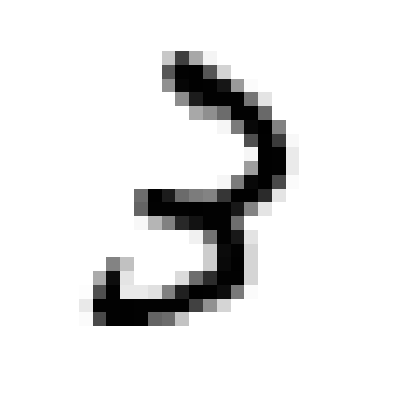

Labelled:  7 Predicted:  4


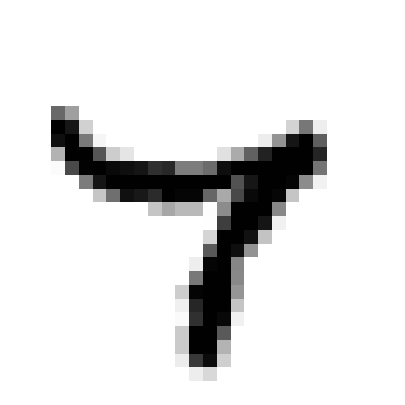

Labelled:  2 Predicted:  9


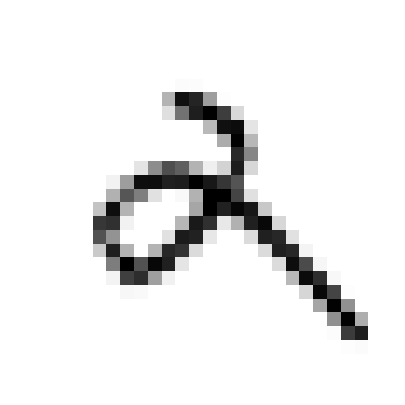

Labelled:  3 Predicted:  2


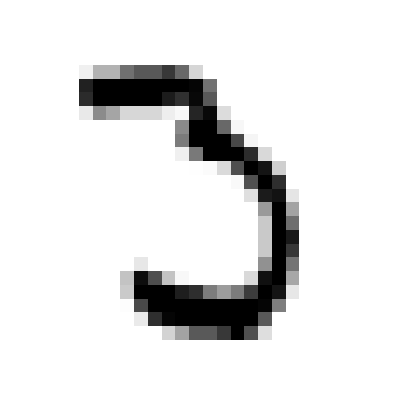

Labelled:  9 Predicted:  8


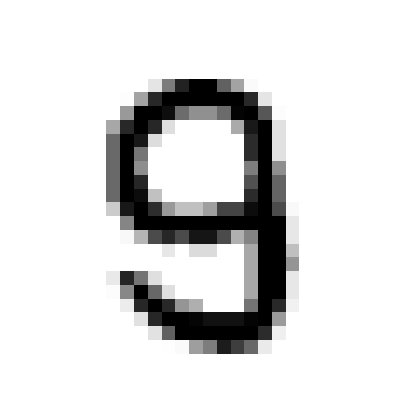

Labelled:  4 Predicted:  6


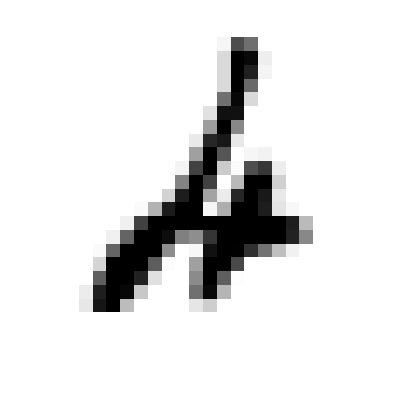

Labelled:  6 Predicted:  0


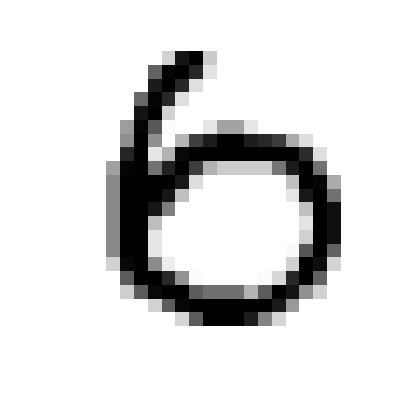

Labelled:  7 Predicted:  2


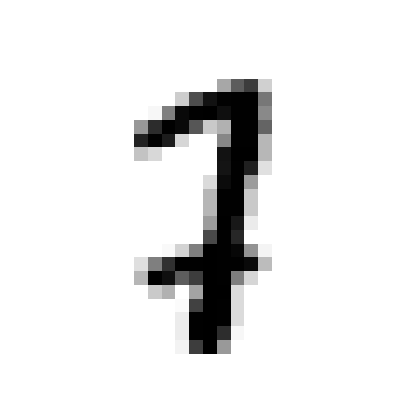

Labelled:  9 Predicted:  7


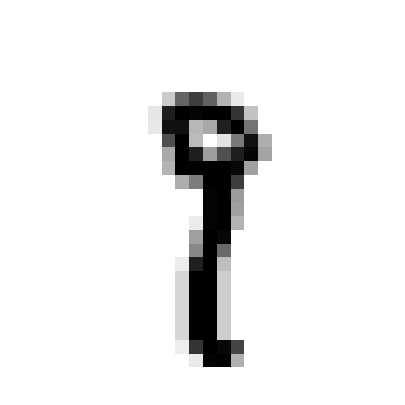

Labelled:  2 Predicted:  7


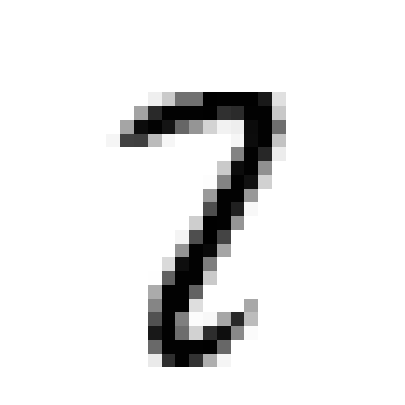

In [38]:
t=0
i=0
while t < 10: #the number of wrong digits to display
    if y_test[i] != pred[i]: 
        t+=1
        some_digit = X_test[i] 
        some_digit_image = some_digit.reshape(28, 28)
        plt.imshow(some_digit_image, cmap=mpl.cm.binary)
        plt.axis("off")
        print('Labelled: ',y_test[i],'Predicted: ',pred[i])
        pl.show()
    i=i+1

<hr style="border:2px solid gray">
<hr style="border:2px solid gray">

<div style="background-color:#efdff2">

# Appendix <a id='appendix'></a>

[Return to Index](#index)

In this section, you will find longer pieces of mathematics and code which are **non-examinable**. Please read at your own discretion

- A. [Regression DT Code Example](#regression_app)
- B. [Adaboost: Mathematics and Code](#adaboost_app)
- C. [Gradient Boosting: Code Example](#gb_app)

<hr style="border:2px solid gray">

<div style="background-color:#efdff2">

## A. Regression DT Code Example [^^](#appendix) <a id='regression_app'></a>
    
[Return to Regression DT section in notes](#regression)

First, we will define a function that splits the data at a given point and calculates the averages on either side. We need to record the poitions of these data splits, so that in future iterations we only divide certain sections.

In [39]:
def calc_regression(y, index, limits_arr):
    '''
    y = The y values of the data
    
    index = The index we will split the data along. 
    NB. The value indexed by index will be in the left grouping
    
    limits_arr = an array that stores our previous limits (including the start and end index)
    '''
    
    repeat=False 
    
    for split_index in limits_arr:
    #This will check if the index is already in the index array
        if (index+1) == split_index:

            repeat=True
            break
    
    limits_arr=np.append(limits_arr, index+1)
    limits_arr=np.sort(limits_arr) #appending the splitting array
    
    length=len(limits_arr)

    loss=0
    avg=[]
    
    if not repeat:

        for i in range(length-1):

            left=limits_arr[i] #the minimum index of the section
            right=limits_arr[i+1] #the maximium index of the section

    
            y_section=y[left:right]

            section_avg=np.average(y_section) #the average of this region

            for val in y_section:
                #adding the residuals
                resid_sq=(val-section_avg)**2
                loss+=resid_sq

            avg.append(section_avg)

        return loss, limits_arr, avg
    
    else: 
        # If we had a repeated index
        return np.inf, [], []
        


<div style="background-color:#efdff2">
    
In this function, we run through all the possible split positions to determine the index with the minimum loss. This is where we will split the data 

In [40]:
def RSS_low(y, index_arr, plot_los):
    
    min_loss = np.inf
    avg_arr=[]
    index_arr_new=[]

    for i in range(len(y)):
        
        rss, index_check, avg_check = calc_regression(y, i, index_arr)

        if rss < min_loss:
            
            min_loss = rss
            index_arr_new = index_check
            avg_arr = avg_check
            
    return index_arr_new, avg_arr

<div style="background-color:#efdff2">
    
Finally, we will combine these functions so that we can repeat the splitting process multiple times. We will also plot the output.

In [41]:
def DT_regression(x, y, depth, show_all=False, plot_loss=False):
    
    index_arr=[0,len(x)-1]
    sort=np.argsort(x)
    
    x=x[sort]
    y=y[sort]

    plt.plot(x, y, "b.")
      
    for i in range(depth):
      
        index_arr, avg_arr= RSS_low(y, index_arr, plot_loss) #Calling the RSS function
        
        xd=[]
        yd=[]
        
        prev_x=x[0]

        for limit, avg in zip(index_arr[1:], avg_arr):
            xd.append(prev_x)
            yd.append(avg)
            
            xd.append(x[limit])
            yd.append(avg)
            
            prev_x=x[limit] #Plotting the regression DT fit
            
        if show_all:
        
            plt.plot(xd, yd, lw=3) 
            
    if not show_all:
        plt.plot(xd, yd, lw=3, color='r') 

<div style="background-color:#efdff2">

If you would like, you may experiment with changing the depth of the tree and the number of samples.

In [42]:
m = 1000
x = 6 * np.random.rand(m) - 3
y = 0.5 * x**2 + x + 2 + np.random.randn(m)


ValueError: operands could not be broadcast together with shapes (70000,784) (1000,) 

In [ ]:
DT_regression(x, y, 20)  

<hr style="border:2px solid gray">

<div style="background-color:#efdff2">

## B. Adaboost: Mathematics and Code [^^](#appendix) <a id='adaboost_app'></a>
    
[Return to Adaboost section in notes](#adaboost)
    
In this region, we will run through a worked example based on [StatQuest](#(https://www.youtube.com/watch?v=LsK-xG1cLYA&t=1054s). We want to predict whether a patient has heart disease. Below, we will crete the dataframe and also add a weight column for each data sample. Initially the sample weights should be equal, therefore 
    
\begin{equation}    
    w_{i} = 1/N
\end{equation}  
where N is the total number of samples. In this case, N=8.

In [ ]:
#Setting up df
import pandas as pd
def setup():
    global data
    d=[[True,True, 205, True],
        [True,True,180, True],
        [True, False, 210, True],
        [True, True, 167, True],
        [False, True, 156, False],
        [False, True, 125, False],
        [True, False, 168, False],
        [False, True, 172, False]]
    Headers=['Chest_Pain', 'Blocked_Arteries', 'Patient_Weight', 'Heart_Disease']
    df=pd.DataFrame(data=d,columns=Headers)
    length=len(df)

    data = df[['Chest_Pain', 'Blocked_Arteries', 'Patient_Weight']].to_numpy()
    target = df['Heart_Disease'].to_numpy()
    

    df['Statistical_Weight'] = np.ones(length)/length    

    return (df)

In [ ]:
df=setup()
display(df)

<div style="background-color:#efdff2">

Now we will create our first stump. To find the stump, we will use the same formula as for DTs.

In [ ]:
def create_stump(df, show=False):
    
    clf = tree.DecisionTreeClassifier(max_depth=1) 
    clf.fit(data, target, df.Statistical_Weight)
    
    if show:
        tree.plot_tree(clf,filled=True)
        pl.show()

    feature_index = clf.tree_.feature[0]
    feature = df.columns[feature_index]
    threshold = clf.tree_.threshold[0]

    prediction=clf.predict(data)
    check = np.logical_xor(df['Heart_Disease'], prediction)

    #An array telling us if whether the output has been correctly predicted

    df['Matches_Prediction']=np.logical_not(check)
    print('Feature: ', feature, '\t Threshold: ', threshold)

    if show:   
        display(df)
    return (clf)

In [ ]:
create_stump(df, True)

<div style="background-color:#efdff2">
    
Our model has done a reasonably good job, only mislabelling one data point at index 3, however it would be useful to have a more numerical method of error. We therefore define the **total error, $\epsilon$**, as $\sum{w_{w}}$, where ${w_{w}}$ are the weights of the data points which have received the **wrong** classification.

We then define the **amount of say**, **$\alpha$**, as:

\begin{equation}    
    \alpha = \frac{1}{2}ln(\frac{1-\epsilon}{\epsilon})
\end{equation} 

This is essentially how much 'weight' this stump will receive compared to others in the final model. For very accurate models (total error close to 0), the amount of say will be large and positive; for very inaccurate models it will be large and *negative* - this essentially flips the models outputs. If the stump performs to a similar standard to guesswork, $\alpha$ will be close to 0. Note that the amout of say equation will be infeasible for a total error of 0 or 1. To correct this, we often add a small error term to prevent. 


In [ ]:
def calc_alpha(df, eps_display=False):
    
    wrong=df[df.Matches_Prediction == False] #Filtering to see where the prediction failed

    epsilon = np.sum(wrong['Statistical_Weight'].to_numpy()) #Summing the weights

    if epsilon==0:
        epsilon= 1e-4 #These error terms have been chosen arbitrarily
    elif epsilon==1:
        epsilon=1-1e-4

    alpha = np.log((1-epsilon)/epsilon)/2

    if eps_display:
        return (alpha, epsilon)
    else:
        return (alpha)


In [ ]:
alpha_1, epsilon_1 = calc_alpha(df, True)
print ('Total error: ',epsilon_1,'. Amount of Say: ', round(alpha_1, 4))

<div style="background-color:#efdff2">
    
We have identified our first stump, and must now update our sample weights. We want to emphasise the importance of correctly identifying data points any previous stumps have failed to identify - in this case we will emphasise the index 3 data. For these incorrect prediction, the new weight is given by:

\begin{equation}    
    w_{i+1} = w_{i}*exp(+\alpha)
\end{equation}  

We should also lower the importance of the correctly identified samples (note the change of sign in front of $\alpha$):

\begin{equation}    
    w_{i+1} = w_{i}*exp(-\alpha)
\end{equation}  

The weights must then be normalised. With our new values of weights, we can then continue the cycle of creating new decision stumps with the weighted data until all the data has been classified correctly or we have reached the maximum number of repeats.

In [ ]:
def calc_weights(df, alpha):

    df.Statistical_Weight=df.Statistical_Weight* np.exp(-2*(df.Matches_Prediction-0.5))
    #Here we are simply converting our boolean values from 0 and 1 to -1 and 1
    total = sum(df.Statistical_Weight)
    df.Statistical_Weight=df.Statistical_Weight/total

In [ ]:
calc_weights(df, alpha)

<div style="background-color:#efdff2">

We can continue generating decision stumps until all the data is correctly classified, or until a stopping criterion is reached (such as maximum number of stumps). 

The model than makes a prediction based on a data point using soft voting. We will use our current example to explain this more clearly:
The data point to be predicted is classifed by each decision stump. All stumps that predict heart disease are grouped together, and their constituent amounts of say are summed. The same happens for those stumps that predict no heart disease. The model will return whichever classification has a larger total.
    
In the cells below, this is replicated by setting classification of 'True' as +1, and 'False' as -1. The sign of the final sum will tell us the output prediction, and the (scaled) magnitude of the sum will tell us the model's confidence.

In [ ]:
def gen_stumps(n_stumps=3):
    clf_list=[]
    alpha_list=[]
    
    df=setup()
    
    for i in range (n_stumps):
        clf = create_stump(df)      
        clf_list.append(clf)
        
        a=calc_alpha(df)
        alpha_list.append(a)
        
        calc_weights(df, a)
    
        
    return ([clf_list, alpha_list])   

In [ ]:
output = gen_stumps()
clf_list=output[0]
alpha_list=output[1]

In [ ]:
test_0=[True, True, 220]
test_1=[False, False, 300]
test_2=[False, False, 150]

alpha_total=np.sum(alpha_list)
test=np.array([test_0, test_1, test_2])
weights_arr=np.array([.0,.0,.0])

for clf, alpha in zip(clf_list,alpha_list):
    predict=np.array(clf.predict(test))
    scale=(predict-0.5)*2 #scaling our values, so that False gives -1 and True gives +1
    weight=alpha*scale
    weights_arr=weight+weights_arr

for i in weights_arr:
    print('Heart Disease: ',(i>0), 'with a confidence value of', round(abs(i/alpha_total), 4))

<hr style="border:2px solid gray">

<div style="background-color:#efdff2">

## C. Gradient Boosting: Regression Code Example [^^](#appendix) <a id='gb_app'></a>
    
[Return to GB section in notes](#gb)
    
Once again, we will start by setting up the dataset we want to train from. We will also set our initial prediction as the average of the actual outputs (this is our initial strong function).

In [ ]:
import pandas as pd
from sklearn import tree
import numpy as np
import pylab as pl 

def setup_GB():
    
    global data
    d=[[1.6, 0, True, 88],
       [1.6, 1, False, 76],
       [1.5, 0, False, 56],
       [1.8, 2, True, 73],
       [1.5, 1, True, 77],
       [1.4, 0, False, 57]]
       
    Headers=['Height', 'Fave_Colour', 'Exercise', 'Weight']
    #The numbers of fave_colour correspond to specific colours
    
    df=pd.DataFrame(data=d,columns=Headers)
    length=len(df)

    data = df[['Height', 'Fave_Colour', 'Exercise',]].to_numpy()
    
    df['Prediction']=np.average(df.Weight)
    return (df)

In [ ]:
df=setup_GB()
display(df)

<div style="background-color:#efdff2">

We will now train train our weak model, which is a DT created to predict the errors. We will limit the tree to have four leaves, although when training on larger datasets this value can be increased to 16 or 20.
    
We will then update our previous prediction by subtracting the weak model. However, simply subtracting the predicted errors would lead to **overfitting** and so we also use a learning rate, $v$

In [ ]:
def create_tree_GB(df, show=False, leaf=4):
    
    df['Errors']=df.Prediction - df.Weight
   
    rgr = tree.DecisionTreeRegressor(max_leaf_nodes=leaf)
    rgr.fit(data, df.Errors)
    
    if show:
        tree.plot_tree(clf,filled=True)
        pl.show()
        display(df)
    return (rgr)

def update_prediction(df, lr=0.1):
    df.Prediction=df.Prediction-lr * df.Errors

In [ ]:
rgr=create_tree(df, show=True)
update_prediction(df, lr=0.1)

<div style="background-color:#efdff2">

Our overall model will be the sum of all these regressors. We will define an overall function that trains the model, and another that will use the trained model to make predictions. Experiment with changing the number of trees and the learning rate.

In [ ]:
def GB(n_trees=4, lr=0.1, DT_show=False):
    
    df=setup_GB()
    
    rgr_list=[lr, np.average(df.Weight)]
    #These parameters are useful to the store in the list for the predictions
    
    for i in range (n_trees):
        rgr = create_tree_GB(df, DT_show)      
        rgr_list.append(rgr)
        update_prediction(df, lr)
        
    return rgr_list 

def predict_GB(test_data, rgr_list):
    lr= rgr_list[0]
    predictions=rgr_list[1] * np.ones(len(test_data))
    
    for rgr in rgr_list[2:]:
        error=lr* np.array(rgr.predict(test_data))
        update = predictions - lr * error
        predictions=update
        
    return predictions

In [ ]:
rgr_list = GB()
predictions= predict_GB(data, rgr_list)
print (predictions)